In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
df = pd.read_excel("C:\\Users\\vallabh\\Vallabha Datta\\Project\\df_reg.xlsx", delimiter=',')
df.head(5)

Unnamed: 0  Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
0           0          1                                2           1   
1           1          2                                3           1   
2           2          3                                6           0   
3           3          4                                1           1   
4           4          5                                1           1   

    Civilian_labor_force_2007   Unemployment_rate_2007  \
0                        24383                     3.3   
1                        82659                     3.1   
2                        10334                     6.3   
3                         8791                     4.1   
4                        26629                     3.2   

    Civilian_labor_force_2008   Unemployment_rate_2008  \
0                        24687                     5.1   
1                        83223                     4.6   
2                        10161                     8.8   
3                         8749                     5.8   
4                        26698                     4.7   

   Civilian_labor_force_2009  Unemployment_rate_2009  ...  \
0                      24703                     9.7  ...   
1                      82451                     9.8  ...   
2                      10003                    14.3  ...   
3                       8742                    13.3  ...   
4                      26480                    10.0  ...   

    Civilian_labor_force_2015   Unemployment_rate_2015  \
0                        25613                     5.2   
1                        87741                     5.5   
2                         8613                     8.9   
3                         8576                     6.6   
4                        24485                     5.4   

    Civilian_labor_force_2016   Unemployment_rate_2016  \
0                        25966                     5.1   
1                        90670                     5.3   
2                         8417                     8.3   
3                         8623                     6.4   
4                        24623                     5.4   

   Civilian_labor_force_2017  Unemployment_rate_2017  \
0                      25972                     3.9   
1                      92090                     4.1   
2                       8317                     5.8   
3                       8550                     4.4   
4                      24725                     4.0   

   Civilian_labor_force_2018  Unemployment_rate_2018  \
0                      25957                     3.6   
1                      93849                     3.6   
2                       8373                     5.2   
3                       8661                     4.0   
4                      25006                     3.5   

   Med_HH_Income_Percent_of_State_Total_2017  State  
0                                      121.1    2.0  
1                                      117.5    2.0  
2                                       67.4    2.0  
3                                       95.0    2.0  
4                                      100.1    2.0  

[5 rows x 30 columns]

In [184]:
df = df.drop('Unnamed: 0', axis=1)
df.head(5)

Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
0          1                                2           1   
1          2                                3           1   
2          3                                6           0   
3          4                                1           1   
4          5                                1           1   

    Civilian_labor_force_2007   Unemployment_rate_2007  \
0                        24383                     3.3   
1                        82659                     3.1   
2                        10334                     6.3   
3                         8791                     4.1   
4                        26629                     3.2   

    Civilian_labor_force_2008   Unemployment_rate_2008  \
0                        24687                     5.1   
1                        83223                     4.6   
2                        10161                     8.8   
3                         8749                     5.8   
4                        26698                     4.7   

   Civilian_labor_force_2009  Unemployment_rate_2009  \
0                      24703                     9.7   
1                      82451                     9.8   
2                      10003                    14.3   
3                       8742                    13.3   
4                      26480                    10.0   

    Civilian_labor_force_2010   ...   Civilian_labor_force_2015   \
0                        25713  ...                        25613   
1                        83459  ...                        87741   
2                        10221  ...                         8613   
3                         8934  ...                         8576   
4                        24906  ...                        24485   

   Unemployment_rate_2015   Civilian_labor_force_2016   \
0                     5.2                        25966   
1                     5.5                        90670   
2                     8.9                         8417   
3                     6.6                         8623   
4                     5.4                        24623   

   Unemployment_rate_2016  Civilian_labor_force_2017  Unemployment_rate_2017  \
0                     5.1                      25972                     3.9   
1                     5.3                      92090                     4.1   
2                     8.3                       8317                     5.8   
3                     6.4                       8550                     4.4   
4                     5.4                      24725                     4.0   

   Civilian_labor_force_2018  Unemployment_rate_2018  \
0                      25957                     3.6   
1                      93849                     3.6   
2                       8373                     5.2   
3                       8661                     4.0   
4                      25006                     3.5   

   Med_HH_Income_Percent_of_State_Total_2017  State  
0                                      121.1    2.0  
1                                      117.5    2.0  
2                                       67.4    2.0  
3                                       95.0    2.0  
4                                      100.1    2.0  

[5 rows x 29 columns]

In [185]:
# Checking for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 29 columns):
Area_name                                    3214 non-null int64
Rural_urban_continuum_code_2013              3214 non-null int64
Metro_2013                                   3214 non-null int64
 Civilian_labor_force_2007                   3214 non-null int64
Unemployment_rate_2007                       3214 non-null float64
 Civilian_labor_force_2008                   3214 non-null int64
Unemployment_rate_2008                       3214 non-null float64
Civilian_labor_force_2009                    3214 non-null int64
Unemployment_rate_2009                       3214 non-null float64
 Civilian_labor_force_2010                   3214 non-null int64
Unemployment_rate_2010                       3214 non-null float64
 Civilian_labor_force_2011                   3214 non-null int64
Unemployment_rate_2011                       3214 non-null float64
 Civilian_labor_force_2012            

From above info, there are 8 null values in "State" column

In [186]:
state_mean = int(df.State.mean())
state_mean

27

Replacing null value with mean
For Montana cat code is 27, So, replacing missing state with Montana
df.State.fillna(state_mean, inplace=True)

In [187]:
df.State.fillna(state_mean, inplace=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 29 columns):
Area_name                                    3214 non-null int64
Rural_urban_continuum_code_2013              3214 non-null int64
Metro_2013                                   3214 non-null int64
 Civilian_labor_force_2007                   3214 non-null int64
Unemployment_rate_2007                       3214 non-null float64
 Civilian_labor_force_2008                   3214 non-null int64
Unemployment_rate_2008                       3214 non-null float64
Civilian_labor_force_2009                    3214 non-null int64
Unemployment_rate_2009                       3214 non-null float64
 Civilian_labor_force_2010                   3214 non-null int64
Unemployment_rate_2010                       3214 non-null float64
 Civilian_labor_force_2011                   3214 non-null int64
Unemployment_rate_2011                       3214 non-null float64
 Civilian_labor_force_2012            

In [189]:
df.shape

(3214, 29)

In [190]:
df['Unemployment_rate_2018'].describe()

count    3214.000000
mean        4.294337
std         1.881752
min         1.300000
25%         3.100000
50%         3.900000
75%         4.900000
max        19.900000
Name: Unemployment_rate_2018, dtype: float64

In [191]:
# Changing Unemployment_rate_2018 to category to perform knn
# Dividing into 5 Categories
lst = []
for i in df.Unemployment_rate_2018:
    if i<=3.1:
        lst.append("Very low")  # If Unemployment_rate is less than 3.1, then it is very low
    elif i>3.1 and i<=3.9:      
        lst.append("Low")       # If Unemployment_rate is between 3.1 & 3.9[including 3.9] then it is low
    elif i>3.9 and i<=4.9:
        lst.append("Average")   # If Unemployment_rate is between 3.9 & 4.9[including 4.9] then it is Average
    elif i>4.9 and i<=10:
        lst.append("High")      # If Unemployment_rate is between 4.9 & 10[including 10] then it is High
    else:
        lst.append("Very High") # If Unemployment_rate is greater than 10, then it is very high
lst

['Low',
 'Low',
 'High',
 'Average',
 'Low',
 'Average',
 'Average',
 'Average',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Average',
 'Low',
 'Average',
 'High',
 'Average',
 'Average',
 'Average',
 'Low',
 'Average',
 'High',
 'Low',
 'Low',
 'Average',
 'Average',
 'Average',
 'Low',
 'Low',
 'High',
 'High',
 'Average',
 'Average',
 'Average',
 'Low',
 'Low',
 'Average',
 'Average',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'Average',
 'Low',
 'Average',
 'High',
 'Average',
 'Low',
 'High',
 'Average',
 'Average',
 'Average',
 'Average',
 'Low',
 'Very low',
 'High',
 'Average',
 'Average',
 'Low',
 'Average',
 'High',
 'High',
 'Average',
 'Very low',
 'Low',
 'High',
 'Very High',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Average',
 'High',
 'High',
 'High',
 'Very High',
 'Very High',
 'High',
 'Very High',
 'High',
 'Very High',
 'Average',
 'High',
 'High',
 'High',
 'Very High',
 'Very High',
 'High',
 'High',
 'High',
 'High',
 'Average',
 'High',
 '

In [192]:
df.Unemployment_rate_2018 = lst

In [193]:
df['Unemployment_rate_2018'].head(5)

0        Low
1        Low
2       High
3    Average
4        Low
Name: Unemployment_rate_2018, dtype: object

In [194]:
# Selecting Unemployment_rate_2018 as target variable
df_target = df['Unemployment_rate_2018']
df = df.drop('Unemployment_rate_2018', axis =1)

In [195]:
from sklearn import preprocessing

In [196]:
# Performing min-max scaling
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [197]:
df_scaled = min_max_scaler.fit_transform(df)
df_scaled

array([[0.  , 0.12, 1.  , ..., 0.01, 0.38, 0.02],
       [0.  , 0.25, 1.  , ..., 0.02, 0.37, 0.02],
       [0.  , 0.62, 0.  , ..., 0.  , 0.13, 0.02],
       ...,
       [1.  , 0.12, 1.  , ..., 0.  , 0.23, 0.51],
       [1.  , 0.  , 1.  , ..., 0.  , 0.23, 0.51],
       [1.  , 0.12, 1.  , ..., 0.  , 0.23, 0.51]])

In [198]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [199]:
df_scaled.head(5)

Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
0   0.000000                            0.125         1.0   
1   0.000310                            0.250         1.0   
2   0.000621                            0.625         0.0   
3   0.000931                            0.000         1.0   
4   0.001242                            0.000         1.0   

    Civilian_labor_force_2007   Unemployment_rate_2007  \
0                     0.005004                0.095238   
1                     0.016985                0.084656   
2                     0.002116                0.253968   
3                     0.001799                0.137566   
4                     0.005466                0.089947   

    Civilian_labor_force_2008   Unemployment_rate_2008  \
0                     0.005000                0.178404   
1                     0.016876                0.154930   
2                     0.002053                0.352113   
3                     0.001766                0.211268   
4                     0.005408                0.159624   

   Civilian_labor_force_2009  Unemployment_rate_2009  \
0                   0.005018                0.300395   
1                   0.016768                0.304348   
2                   0.002027                0.482213   
3                   0.001770                0.442688   
4                   0.005379                0.312253   

    Civilian_labor_force_2010   ...  Unemployment_rate_2014  \
0                     0.005215  ...                0.182540   
1                     0.016958  ...                0.194444   
2                     0.002064  ...                0.369048   
3                     0.001802  ...                0.238095   
4                     0.005051  ...                0.194444   

    Civilian_labor_force_2015   Unemployment_rate_2015  \
0                     0.005118                0.149780   
1                     0.017569                0.162996   
2                     0.001711                0.312775   
3                     0.001703                0.211454   
4                     0.004892                0.158590   

    Civilian_labor_force_2016   Unemployment_rate_2016  \
0                     0.005134                0.151786   
1                     0.017968                0.160714   
2                     0.001653                0.294643   
3                     0.001693                0.209821   
4                     0.004867                0.165179   

   Civilian_labor_force_2017  Unemployment_rate_2017  \
0                   0.005077                0.125654   
1                   0.018050                0.136126   
2                   0.001612                0.225131   
3                   0.001658                0.151832   
4                   0.004832                0.130890   

   Civilian_labor_force_2018  Med_HH_Income_Percent_of_State_Total_2017  \
0                   0.005034                                   0.383924   
1                   0.018252                                   0.366903   
2                   0.001610                                   0.130024   
3                   0.001666                                   0.260520   
4                   0.004849                                   0.284634   

      State  
0  0.019608  
1  0.019608  
2  0.019608  
3  0.019608  
4  0.019608  

[5 rows x 28 columns]

In [200]:
np.set_printoptions(precision=2, linewidth=100)

In [201]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
df_train, df_test, df_target_train, df_target_test = train_test_split(df_scaled, df_target, test_size=0.2, random_state=478)

In [202]:
df_target_train.head(5)

599         High
809     Very low
1785         Low
725          Low
2935    Very low
Name: Unemployment_rate_2018, dtype: object

In [203]:
df_target_test.head(5)

2947       High
2335    Average
511        High
2503        Low
1794    Average
Name: Unemployment_rate_2018, dtype: object

In [204]:
df_train.head(5)

Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
599    0.188451                            0.625         0.0   
809    0.253648                            1.000         0.0   
1785   0.556659                            0.000         1.0   
725    0.227569                            0.625         0.0   
2935   0.913691                            0.000         1.0   

       Civilian_labor_force_2007   Unemployment_rate_2007  \
599                      0.003692                0.185185   
809                      0.000854                0.137566   
1785                     0.036842                0.084656   
725                      0.004108                0.169312   
2935                     0.001292                0.042328   

       Civilian_labor_force_2008   Unemployment_rate_2008  \
599                      0.003632                0.244131   
809                      0.000858                0.117371   
1785                     0.036833                0.126761   
725                      0.004085                0.253521   
2935                     0.001290                0.079812   

      Civilian_labor_force_2009  Unemployment_rate_2009  \
599                    0.003597                0.312253   
809                    0.000847                0.181818   
1785                   0.037168                0.205534   
725                    0.004006                0.422925   
2935                   0.001252                0.122530   

       Civilian_labor_force_2010   ...  Unemployment_rate_2014  \
599                      0.003486  ...                0.250000   
809                      0.000894  ...                0.103175   
1785                     0.035258  ...                0.158730   
725                      0.003857  ...                0.182540   
2935                     0.001286  ...                0.130952   

       Civilian_labor_force_2015   Unemployment_rate_2015  \
599                      0.003085                0.211454   
809                      0.000873                0.066079   
1785                     0.034546                0.123348   
725                      0.003720                0.114537   
2935                     0.001227                0.092511   

       Civilian_labor_force_2016   Unemployment_rate_2016  \
599                      0.003032                0.209821   
809                      0.000857                0.066964   
1785                     0.034082                0.107143   
725                      0.003690                0.102679   
2935                     0.001204                0.080357   

      Civilian_labor_force_2017  Unemployment_rate_2017  \
599                    0.002897                0.198953   
809                    0.000818                0.057592   
1785                   0.033406                0.120419   
725                    0.003594                0.109948   
2935                   0.001209                0.099476   

      Civilian_labor_force_2018  Med_HH_Income_Percent_of_State_Total_2017  \
599                    0.002869                                   0.207565   
809                    0.000822                                   0.148463   
1785                   0.032909                                   0.471395   
725                    0.003558                                   0.279905   
2935                   0.001204                                   0.466667   

         State  
599   0.274510  
809   0.235294  
1785  0.627451  
725   0.294118  
2935  0.901961  

[5 rows x 28 columns]

In [205]:
df_test.head(5)

Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
2947   0.917417                            0.625         0.0   
2335   0.727414                            0.125         1.0   
511    0.161130                            0.875         0.0   
2503   0.779572                            0.125         1.0   
1794   0.559454                            0.500         0.0   

       Civilian_labor_force_2007   Unemployment_rate_2007  \
2947                     0.001641                0.269841   
2335                     0.026773                0.185185   
511                      0.000641                0.259259   
2503                     0.015212                0.132275   
1794                     0.004301                0.068783   

       Civilian_labor_force_2008   Unemployment_rate_2008  \
2947                     0.001638                0.248826   
2335                     0.026511                0.272300   
511                      0.000639                0.248826   
2503                     0.015133                0.187793   
1794                     0.004255                0.089202   

      Civilian_labor_force_2009  Unemployment_rate_2009  \
2947                   0.001684                0.272727   
2335                   0.026501                0.379447   
511                    0.000627                0.288538   
2503                   0.015249                0.264822   
1794                   0.004337                0.094862   

       Civilian_labor_force_2010   ...  Unemployment_rate_2014  \
2947                     0.001702  ...                0.238095   
2335                     0.026615  ...                0.246032   
511                      0.000570  ...                0.261905   
2503                     0.014961  ...                0.218254   
1794                     0.004375  ...                0.154762   

       Civilian_labor_force_2015   Unemployment_rate_2015  \
2947                     0.001710                0.229075   
2335                     0.027487                0.233480   
511                      0.000523                0.259912   
2503                     0.013816                0.176211   
1794                     0.004384                0.136564   

       Civilian_labor_force_2016   Unemployment_rate_2016  \
2947                     0.001711                0.209821   
2335                     0.027761                0.187500   
511                      0.000527                0.223214   
2503                     0.013798                0.156250   
1794                     0.004339                0.147321   

      Civilian_labor_force_2017  Unemployment_rate_2017  \
2947                   0.001722                0.219895   
2335                   0.028121                0.183246   
511                    0.000529                0.240838   
2503                   0.013697                0.136126   
1794                   0.004344                0.162304   

      Civilian_labor_force_2018  Med_HH_Income_Percent_of_State_Total_2017  \
2947                   0.001826                                   0.131442   
2335                   0.028366                                   0.240189   
511                    0.000532                                   0.116785   
2503                   0.013628                                   0.227896   
1794                   0.004191                                   0.249173   

         State  
2947  0.941176  
2335  0.803922  
511   0.196078  
2503  0.843137  
1794  0.627451  

[5 rows x 28 columns]

In [206]:
print("Shape of Train data: ", df_train.shape)
print("Shape of Test data: ", df_test.shape)

Shape of Train data:  (2571, 28)
Shape of Test data:  (643, 28)


In [207]:
df_train_arr = np.array(df_train)
df_test_arr = np.array(df_test)
df_target_train_arr = np.array(df_target_train)
df_target_test_arr = np.array(df_target_test)

In [208]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [209]:
neigh_idx, distances = knn_search(df_test_arr[0], df_train_arr, 5, 0)

In [210]:
print(neigh_idx)
print("\nNearest Neigbors:")
df_train.iloc[neigh_idx]

[1157 1021 2130  643  952]

Nearest Neigbors:


Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
2970   0.924558                            0.625         0.0   
2915   0.907482                            0.625         0.0   
3030   0.943185                            0.625         0.0   
2926   0.910897                            0.625         0.0   
3074   0.956846                            0.625         0.0   

       Civilian_labor_force_2007   Unemployment_rate_2007  \
2970                     0.004235                0.291005   
2915                     0.000547                0.232804   
3030                     0.000969                0.238095   
2926                     0.000478                0.164021   
3074                     0.002189                0.248677   

       Civilian_labor_force_2008   Unemployment_rate_2008  \
2970                     0.004331                0.262911   
2915                     0.000534                0.258216   
3030                     0.000935                0.173709   
2926                     0.000483                0.239437   
3074                     0.002157                0.225352   

      Civilian_labor_force_2009  Unemployment_rate_2009  \
2970                   0.004499                0.296443   
2915                   0.000549                0.316206   
3030                   0.000938                0.229249   
2926                   0.000496                0.300395   
3074                   0.002226                0.316206   

       Civilian_labor_force_2010   ...  Unemployment_rate_2014  \
2970                     0.004530  ...                0.234127   
2915                     0.000532  ...                0.269841   
3030                     0.000958  ...                0.238095   
2926                     0.000453  ...                0.261905   
3074                     0.002056  ...                0.250000   

       Civilian_labor_force_2015   Unemployment_rate_2015  \
2970                     0.004236                0.229075   
2915                     0.000469                0.185022   
3030                     0.000890                0.229075   
2926                     0.000436                0.220264   
3074                     0.001884                0.189427   

       Civilian_labor_force_2016   Unemployment_rate_2016  \
2970                     0.004227                0.218750   
2915                     0.000455                0.187500   
3030                     0.000890                0.196429   
2926                     0.000432                0.200893   
3074                     0.001886                0.156250   

      Civilian_labor_force_2017  Unemployment_rate_2017  \
2970                   0.004081                0.277487   
2915                   0.000460                0.235602   
3030                   0.000839                0.230366   
2926                   0.000397                0.235602   
3074                   0.001877                0.141361   

      Civilian_labor_force_2018  Med_HH_Income_Percent_of_State_Total_2017  \
2970                   0.004031                                   0.110165   
2915                   0.000448                                   0.062411   
3030                   0.000797                                   0.165485   
2926                   0.000384                                   0.127187   
3074                   0.001834                                   0.185343   

         State  
2970  0.941176  
2915  0.901961  
3030  0.980392  
2926  0.901961  
3074  0.960784  

[5 rows x 28 columns]

In [211]:
# printing distances of top 5 nearest neighbors
print(distances[neigh_idx])

[0.07 0.12 0.12 0.13 0.14]


In [212]:
neigh_labels = df_target_train_arr[neigh_idx]
print(neigh_labels)

['High' 'Average' 'High' 'Average' 'Average']


Top 5 nearest neighbors are: High, Average, High, Average, Average

In [213]:
from collections import Counter
print(Counter(neigh_labels))

Counter({'Average': 3, 'High': 2})


In [214]:
Counter(neigh_labels).most_common(1)

[('Average', 3)]

Since, majority of votes are Average for top 5 nearest neighbours, the predicted value of unemployment rate will fall under Average category

In [215]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_target, test_size=0.2, random_state=50)

In [216]:
from sklearn.neighbors import KNeighborsClassifier

Using KNN classifier

In [217]:
knn = KNeighborsClassifier(n_neighbors=5)

In [218]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [219]:
# Performing prediction
pred = knn.predict(X_test)

In [220]:
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[118  16  26   0   0]
 [ 32 100   2   3   0]
 [ 41   2 101   0  24]
 [  0   3   0  11   0]
 [  4   0  38   0 122]]
              precision    recall  f1-score   support

     Average       0.61      0.74      0.66       160
        High       0.83      0.73      0.78       137
         Low       0.60      0.60      0.60       168
   Very High       0.79      0.79      0.79        14
    Very low       0.84      0.74      0.79       164

    accuracy                           0.70       643
   macro avg       0.73      0.72      0.72       643
weighted avg       0.71      0.70      0.71       643



In [221]:
error_rate = []

for i in range(1,40):
    
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

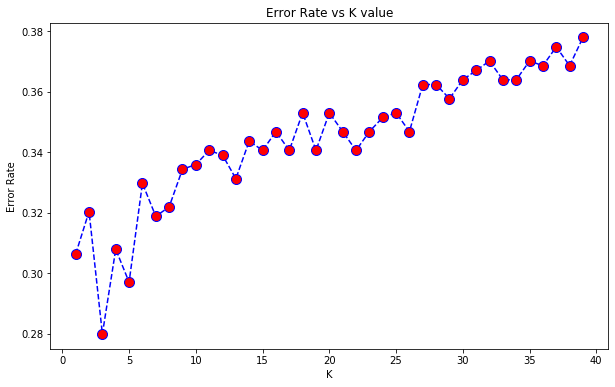

In [222]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the Error vs K plot, the best value of k is 3. So, performing prediction with 3 neighbors

In [738]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[118  18  24   0   0]
 [ 26 108   1   2   0]
 [ 43   1 101   0  23]
 [  0   3   0  11   0]
 [  7   0  32   0 125]]
              precision    recall  f1-score   support

     Average       0.61      0.74      0.67       160
        High       0.83      0.79      0.81       137
         Low       0.64      0.60      0.62       168
   Very High       0.85      0.79      0.81        14
    Very low       0.84      0.76      0.80       164

    accuracy                           0.72       643
   macro avg       0.75      0.73      0.74       643
weighted avg       0.73      0.72      0.72       643



Accuracy using knn classifier is 72%

2) USING TERM DOCUMENT CATEGORIZATION

In [223]:
df_train.shape

(2571, 28)

In [224]:
numTerms=df_train.shape[0]
NDocs = df_train.shape[1]

In [225]:
termFreqs = df_train.sum(axis=1)
termFreqs.head(5)

599     4.180771
809     2.910387
1785    4.862333
725     4.041086
2935    4.560031
dtype: float64

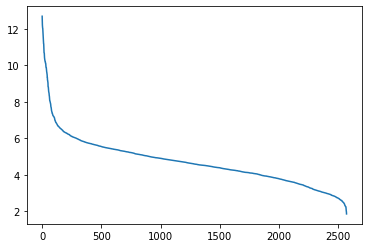

In [226]:
plt.plot(sorted(termFreqs, reverse=True))
plt.show()

In [227]:
DF = pd.DataFrame([(df_train!=0).sum(1)]).T
DF.head(5)

0
599   27
809   27
1785  27
725   27
2935  27

In [228]:
NMatrix=np.ones(np.shape(df_train), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[28. 28. 28. ... 28. 28. 28.]
 [28. 28. 28. ... 28. 28. 28.]
 [28. 28. 28. ... 28. 28. 28.]
 ...
 [28. 28. 28. ... 28. 28. 28.]
 [28. 28. 28. ... 28. 28. 28.]
 [28. 28. 28. ... 28. 28. 28.]]


In [229]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

In [230]:
IDF

array([[0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       ...,
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [231]:
TD_tfidf = df_train * IDF

In [232]:
TD_tfidf.head(10)

Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
599    0.009888                         0.032792    0.000000   
809    0.013308                         0.052467    0.000000   
1785   0.029206                         0.000000    0.052467   
725    0.011940                         0.032792    0.000000   
2935   0.047939                         0.000000    0.052467   
1092   0.017918                         0.000000    0.052467   
1677   0.027447                         0.045909    0.000000   
3155   0.051523                         0.000000    0.052467   
1239   0.020313                         0.039351    0.000000   
2364   0.038638                         0.032792    0.000000   

       Civilian_labor_force_2007   Unemployment_rate_2007  \
599                      0.000194                0.009716   
809                      0.000045                0.007218   
1785                     0.001933                0.004442   
725                      0.000216                0.008883   
2935                     0.000068                0.002221   
1092                     0.000229                0.008883   
1677                     0.000034                0.002776   
3155                     0.000057                0.040530   
1239                     0.000152                0.020265   
2364                     0.000057                0.003331   

       Civilian_labor_force_2008   Unemployment_rate_2008  \
599                      0.000191                0.012809   
809                      0.000045                0.006158   
1785                     0.001933                0.006651   
725                      0.000214                0.013302   
2935                     0.000068                0.004188   
1092                     0.000228                0.010838   
1677                     0.000033                0.004188   
3155                     0.000055                0.042861   
1239                     0.000149                0.020445   
2364                     0.000058                0.003695   

      Civilian_labor_force_2009  Unemployment_rate_2009  \
599                    0.000189                0.016383   
809                    0.000044                0.009540   
1785                   0.001950                0.010784   
725                    0.000210                0.022190   
2935                   0.000066                0.006429   
1092                   0.000234                0.015139   
1677                   0.000034                0.004148   
3155                   0.000056                0.046453   
1239                   0.000146                0.026337   
2364                   0.000058                0.006221   

       Civilian_labor_force_2010   ...  Unemployment_rate_2014  \
599                      0.000183  ...                0.013117   
809                      0.000047  ...                0.005413   
1785                     0.001850  ...                0.008328   
725                      0.000202  ...                0.009577   
2935                     0.000067  ...                0.006871   
1092                     0.000232  ...                0.007912   
1677                     0.000034  ...                0.002498   
3155                     0.000050  ...                0.045388   
1239                     0.000142  ...                0.014574   
2364                     0.000054  ...                0.004580   

       Civilian_labor_force_2015   Unemployment_rate_2015  \
599                      0.000162                0.011094   
809                      0.000046                0.003467   
1785                     0.001813                0.006472   
725                      0.000195                0.006009   
2935                     0.000064                0.004854   
1092                     0.000240                0.005085   
1677                     0.000033                0.002774   
3155                     0.000040                0.035826   
1239                     0.0001

In [233]:
IDF.T[0].shape

(2571,)

Converting test data using TD*iDF

In [234]:
numTerms2=df_test.shape[0]
NDocs2 = df_test.shape[1]

In [235]:
DF2 = pd.DataFrame([(df_test!=0).sum(1)]).T
DF2.head(10)

0
2947  27
2335  28
511   27
2503  28
1794  27
166   27
2337  28
1679  27
2082  27
1351  27

In [236]:
NMatrix2=np.ones(np.shape(df_test), dtype=float)*NDocs2
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix2)

[[28. 28. 28. ... 28. 28. 28.]
 [28. 28. 28. ... 28. 28. 28.]
 [28. 28. 28. ... 28. 28. 28.]
 ...
 [28. 28. 28. ... 28. 28. 28.]
 [28. 28. 28. ... 28. 28. 28.]
 [28. 28. 28. ... 28. 28. 28.]]


In [237]:
IDF2 = np.log2(np.divide(NMatrix2, np.array(DF2)))
IDF2

array([[0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       ...,
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05]])

In [238]:
df2_tfidf = df_test * IDF2

In [239]:
df2_tfidf.head(5)

Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
2947   0.048135                         0.032792         0.0   
2335   0.000000                         0.000000         0.0   
511    0.008454                         0.045909         0.0   
2503   0.000000                         0.000000         0.0   
1794   0.029353                         0.026234         0.0   

       Civilian_labor_force_2007   Unemployment_rate_2007  \
2947                     0.000086                0.014158   
2335                     0.000000                0.000000   
511                      0.000034                0.013603   
2503                     0.000000                0.000000   
1794                     0.000226                0.003609   

       Civilian_labor_force_2008   Unemployment_rate_2008  \
2947                     0.000086                0.013055   
2335                     0.000000                0.000000   
511                      0.000034                0.013055   
2503                     0.000000                0.000000   
1794                     0.000223                0.004680   

      Civilian_labor_force_2009  Unemployment_rate_2009  \
2947                   0.000088                0.014309   
2335                   0.000000                0.000000   
511                    0.000033                0.015139   
2503                   0.000000                0.000000   
1794                   0.000228                0.004977   

       Civilian_labor_force_2010   ...  Unemployment_rate_2014  \
2947                     0.000089  ...                0.012492   
2335                     0.000000  ...                0.000000   
511                      0.000030  ...                0.013741   
2503                     0.000000  ...                0.000000   
1794                     0.000230  ...                0.008120   

       Civilian_labor_force_2015   Unemployment_rate_2015  \
2947                     0.000090                0.012019   
2335                     0.000000                0.000000   
511                      0.000027                0.013637   
2503                     0.000000                0.000000   
1794                     0.000230                0.007165   

       Civilian_labor_force_2016   Unemployment_rate_2016  \
2947                     0.000090                0.011009   
2335                     0.000000                0.000000   
511                      0.000028                0.011711   
2503                     0.000000                0.000000   
1794                     0.000228                0.007730   

      Civilian_labor_force_2017  Unemployment_rate_2017  \
2947                   0.000090                0.011537   
2335                   0.000000                0.000000   
511                    0.000028                0.012636   
2503                   0.000000                0.000000   
1794                   0.000228                0.008516   

      Civilian_labor_force_2018  Med_HH_Income_Percent_of_State_Total_2017  \
2947                   0.000096                                   0.006896   
2335                   0.000000                                   0.000000   
511                    0.000028                                   0.006127   
2503                   0.000000                                   0.000000   
1794                   0.000220                                   0.013073   

         State  
2947  0.049381  
2335  0.000000  
511   0.010288  
2503  0.000000  
1794  0.032921  

[5 rows x 28 columns]

In [240]:
error_rate = []

for i in range(1,40):
    
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(df_train, df_target_train)
    pred_i = knn.predict(df_test)
    error_rate.append(np.mean(pred_i != df_target_test))

Text(0, 0.5, 'Error Rate')

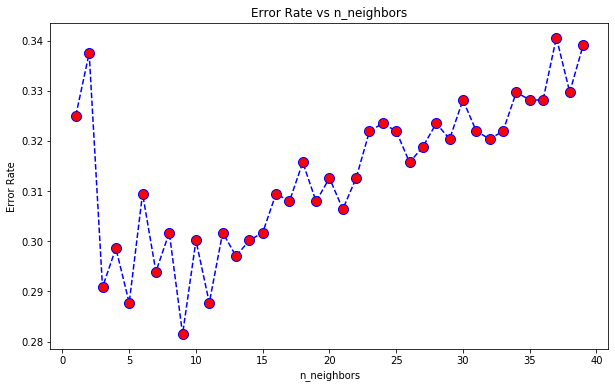

In [241]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')

In [242]:
# From the above graph the best k value is 10
knn = KNeighborsClassifier(n_neighbors=10)

In [243]:
knn.fit(TD_tfidf, df_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [244]:
pred = knn.predict(df2_tfidf)

In [546]:
print(confusion_matrix(df_target_test, pred))
print(classification_report(df_target_test, pred))

[[121   7  33   0   0]
 [ 60  83   2   1   0]
 [ 64   2  72   0  21]
 [  5   1   0   7   0]
 [ 39   0  16   0 109]]
              precision    recall  f1-score   support

     Average       0.42      0.75      0.54       161
        High       0.89      0.57      0.69       146
         Low       0.59      0.45      0.51       159
   Very High       0.88      0.54      0.67        13
    Very low       0.84      0.66      0.74       164

    accuracy                           0.61       643
   macro avg       0.72      0.60      0.63       643
weighted avg       0.68      0.61      0.62       643



In [732]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(df_target_test, pred))

Accuracy: 0.609642301710731


From the above classification report, 
Wei_Ave using TD*IDF = 0.61,
Wei_Ave using Knn = 0.73. So, knn model without using TD_IDF is best in this case.

Predicting the Unemploment_rate for random query

In [245]:
import random
x=[]
for i in range(1,29):
    y = random.random()
    x.append(y)

In [246]:
# Each term in query x must be multiplied by the idf value of the term we computed earlier (the IDF matrix)
x_tfidf = x * IDF[0]  # note that this coordinatewise multiplication of two vectors
print(x_tfidf)

[0.03 0.02 0.02 0.03 0.   0.02 0.02 0.02 0.05 0.03 0.05 0.01 0.05 0.01 0.05 0.02 0.04 0.02 0.04 0.02 0.04 0.04 0.02
 0.03 0.05 0.03 0.05 0.04]


In [247]:
x_tfidf.shape

(28,)

In [248]:
DT_tfidf = TD_tfidf
DT_array = np.array(DT_tfidf)

In [249]:
DT_array.shape

(2571, 28)

In [250]:
df.head(5)

Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
0          1                                2           1   
1          2                                3           1   
2          3                                6           0   
3          4                                1           1   
4          5                                1           1   

    Civilian_labor_force_2007   Unemployment_rate_2007  \
0                        24383                     3.3   
1                        82659                     3.1   
2                        10334                     6.3   
3                         8791                     4.1   
4                        26629                     3.2   

    Civilian_labor_force_2008   Unemployment_rate_2008  \
0                        24687                     5.1   
1                        83223                     4.6   
2                        10161                     8.8   
3                         8749                     5.8   
4                        26698                     4.7   

   Civilian_labor_force_2009  Unemployment_rate_2009  \
0                      24703                     9.7   
1                      82451                     9.8   
2                      10003                    14.3   
3                       8742                    13.3   
4                      26480                    10.0   

    Civilian_labor_force_2010   ...  Unemployment_rate_2014  \
0                        25713  ...                     5.8   
1                        83459  ...                     6.1   
2                        10221  ...                    10.5   
3                         8934  ...                     7.2   
4                        24906  ...                     6.1   

    Civilian_labor_force_2015   Unemployment_rate_2015  \
0                        25613                     5.2   
1                        87741                     5.5   
2                         8613                     8.9   
3                         8576                     6.6   
4                        24485                     5.4   

    Civilian_labor_force_2016   Unemployment_rate_2016  \
0                        25966                     5.1   
1                        90670                     5.3   
2                         8417                     8.3   
3                         8623                     6.4   
4                        24623                     5.4   

   Civilian_labor_force_2017  Unemployment_rate_2017  \
0                      25972                     3.9   
1                      92090                     4.1   
2                       8317                     5.8   
3                       8550                     4.4   
4                      24725                     4.0   

   Civilian_labor_force_2018  Med_HH_Income_Percent_of_State_Total_2017  State  
0                      25957                                      121.1    2.0  
1                      93849                                      117.5    2.0  
2                       8373                                       67.4    2.0  
3                       8661                                       95.0    2.0  
4                      25006                                      100.1    2.0  

[5 rows x 28 columns]

In [251]:
DT_array

array([[0.01, 0.03, 0.  , ..., 0.  , 0.01, 0.01],
       [0.01, 0.05, 0.  , ..., 0.  , 0.01, 0.01],
       [0.03, 0.  , 0.05, ..., 0.  , 0.02, 0.03],
       ...,
       [0.01, 0.03, 0.  , ..., 0.  , 0.01, 0.01],
       [0.03, 0.05, 0.  , ..., 0.  , 0.01, 0.03],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [253]:
neigh_idx, distances = knn_search(x_tfidf, DT_array, 5, 0)

In [261]:
# Distances between query objects and training objects
distances

599     0.134945
809     0.156081
1785    0.136887
725     0.135991
2935    0.147776
1092    0.140957
1677    0.156669
3155    0.114747
1239    0.128217
2364    0.151268
662     0.172255
1197    0.138889
631     0.140456
1268    0.123151
2694    0.172255
2186    0.147536
3051    0.172255
2867    0.146870
2283    0.134101
618     0.139505
628     0.139951
2192    0.172255
2072    0.124232
1872    0.131997
2475    0.129815
1985    0.153233
1736    0.172255
933     0.142501
2600    0.134982
1884    0.172255
          ...   
1680    0.158748
3118    0.154224
2270    0.136018
74      0.146752
2758    0.153735
1845    0.114103
1169    0.172255
250     0.145889
1044    0.128462
3156    0.122682
812     0.147769
3052    0.138581
1916    0.172255
388     0.138655
1243    0.172255
2740    0.153273
1252    0.132629
2057    0.140593
2671    0.172255
892     0.142526
1300    0.125763
394     0.172255
578     0.148689
813     0.172255
658     0.142022
1328    0.147323
910     0.153522
614     0.1358

In [262]:
distances = pd.Series(distances, index=DT_tfidf.index)

In [263]:
print("Query:", x)
print("\nNeighbors:")
DT_tfidf.iloc[neigh_idx]

Query: [0.5608007595939081, 0.2905119215962363, 0.41572183637919524, 0.5025859896876501, 0.06953687108568318, 0.3218298791514469, 0.3121312530291861, 0.29532002204996655, 0.9467592098583358, 0.480818248593745, 0.9001582026446081, 0.17634029184061495, 0.8612775136710384, 0.157902146584608, 0.8706675545122469, 0.45416998323142777, 0.8523810221281192, 0.4475047839252013, 0.7162912721355623, 0.4078894184917433, 0.7289607483997964, 0.7957818655287694, 0.32473513733944404, 0.6508277110737821, 0.9770035059257403, 0.63062272225393, 0.9272559798078915, 0.6703456684534456]

Neighbors:


Area_name  Rural_urban_continuum_code_2013  Metro_2013  \
1805   0.029532                         0.032792    0.000000   
3157   0.051555                         0.019675    0.000000   
604    0.009969                         0.000000    0.052467   
1306   0.021404                         0.000000    0.052467   
3203   0.052305                         0.019675    0.000000   

       Civilian_labor_force_2007   Unemployment_rate_2007  \
1805                     0.000132                0.023874   
3157                     0.000125                0.033035   
604                      0.028215                0.010549   
1306                     0.009530                0.018877   
3203                     0.000091                0.035256   

       Civilian_labor_force_2008   Unemployment_rate_2008  \
1805                     0.000131                0.026603   
3157                     0.000125                0.035964   
604                      0.027843                0.012563   
1306                     0.009195                0.019706   
3203                     0.000094                0.028820   

      Civilian_labor_force_2009  Unemployment_rate_2009  \
1805                   0.000132                0.031937   
3157                   0.000122                0.039402   
604                    0.027806                0.017420   
1306                   0.009287                0.029241   
3203                   0.000097                0.035047   

       Civilian_labor_force_2010   ...   Civilian_labor_force_2015   \
1805                     0.000124  ...                     0.000116   
3157                     0.000129  ...                     0.000115   
604                      0.028209  ...                     0.027861   
1306                     0.008565  ...                     0.007995   
3203                     0.000110  ...                     0.000099   

      Unemployment_rate_2015   Civilian_labor_force_2016   \
1805                0.035595                     0.000111   
3157                0.039524                     0.000112   
604                 0.010170                     0.027738   
1306                0.011788                     0.008120   
3203                0.038137                     0.000102   

      Unemployment_rate_2016  Civilian_labor_force_2017  \
1805                0.029747                   0.000107   
3157                0.038414                   0.000105   
604                 0.010072                   0.027164   
1306                0.010775                   0.008142   
3203                0.035134                   0.000099   

      Unemployment_rate_2017  Civilian_labor_force_2018  \
1805                0.032689                   0.000102   
3157                0.040381                   0.000101   
604                 0.009889                   0.026676   
1306                0.011263                   0.008115   
3203                0.032964                   0.000088   

      Med_HH_Income_Percent_of_State_Total_2017     State   Category  
1805                                   0.006227  0.032921  Very High  
3157                                   0.012206  0.040122  Very High  
604                                    0.014264  0.014403    Average  
1306                                   0.010543  0.023662       High  
3203                                   0.012206  0.040122  Very High  

[5 rows x 29 columns]

In [264]:
df_target.shape

(3214,)

In [265]:
cat_labels = np.array(df_target_train)
cat_labels = pd.Series(cat_labels, index=DT_tfidf.index)

DT_tfidf["Category"] = cat_labels

In [266]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    print("Labels for top ", K, "neighbors: ", count)
    return count.most_common(1)[0][0]

In [267]:
print("Instance to classify:\n", x)
print("Predicted Category for the new instance: ", knn_classify(x_tfidf, DT_array, 5, cat_labels, 0))

Instance to classify:
 [0.5608007595939081, 0.2905119215962363, 0.41572183637919524, 0.5025859896876501, 0.06953687108568318, 0.3218298791514469, 0.3121312530291861, 0.29532002204996655, 0.9467592098583358, 0.480818248593745, 0.9001582026446081, 0.17634029184061495, 0.8612775136710384, 0.157902146584608, 0.8706675545122469, 0.45416998323142777, 0.8523810221281192, 0.4475047839252013, 0.7162912721355623, 0.4078894184917433, 0.7289607483997964, 0.7957818655287694, 0.32473513733944404, 0.6508277110737821, 0.9770035059257403, 0.63062272225393, 0.9272559798078915, 0.6703456684534456]
Labels for top  5 neighbors:  Counter({'High': 3, 'Average': 1, 'Low': 1})
Predicted Category for the new instance:  High


Predicted category for the new instance using TD*IDF is "High"

3) USING DECISION TREE CLASSIFIER

In [268]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [269]:
dtree.fit(df_train,df_target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [270]:
predictions = dtree.predict(df_test)

In [271]:
print(dtree.score(df_test, df_target_test))

0.7107309486780715


In [272]:
print(dtree.score(df_train, df_target_train))

1.0


Tree performed well for training set than testing set. Tree score for training set is 1 which is not possible practically. So, we can infer that the decision tree model is too simple and underfitted

In [552]:
print(classification_report(df_target_test,predictions))

              precision    recall  f1-score   support

     Average       0.60      0.67      0.64       161
        High       0.82      0.73      0.78       146
         Low       0.64      0.62      0.63       159
   Very High       0.63      0.92      0.75        13
    Very low       0.84      0.84      0.84       164

    accuracy                           0.72       643
   macro avg       0.71      0.76      0.73       643
weighted avg       0.72      0.72      0.72       643



Accuracy using decision tree is 72%

Setting criterion to entropy

In [273]:
dtree = DecisionTreeClassifier(criterion = "entropy")

In [274]:
dtree.fit(df_train,df_target_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [275]:
predictions = dtree.predict(df_test)
print(classification_report(df_target_test,predictions))

              precision    recall  f1-score   support

     Average       0.69      0.72      0.71       161
        High       0.83      0.82      0.83       146
         Low       0.69      0.64      0.66       159
   Very High       0.61      0.85      0.71        13
    Very low       0.85      0.87      0.86       164

    accuracy                           0.76       643
   macro avg       0.74      0.78      0.75       643
weighted avg       0.76      0.76      0.76       643



After setting criterion as "entropy", I got accuracy as 76%. Which is better than "gini" criterion

Changing default values in decision tree classifier

In [276]:
error_rate = []

for i in range(1,40):
    
    dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    dtree.fit(df_train,df_target_train)
    predictions = dtree.predict(df_test)
    error_rate.append(np.mean(predictions != df_target_test))

Text(0, 0.5, 'Error Rate')

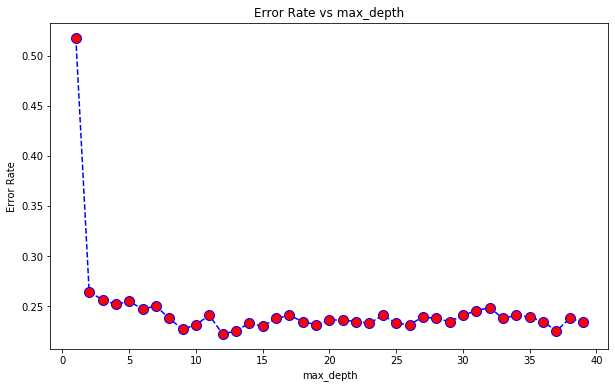

In [277]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')

In [278]:
# from the above plot, best value of max_depth =13
dtree = DecisionTreeClassifier(criterion = "entropy",max_depth = 13)

In [279]:
t = dtree.fit(df_train,df_target_train)

In [673]:
predictions = dtree.predict(df_test)
print(classification_report(df_target_test,predictions))

              precision    recall  f1-score   support

     Average       0.72      0.73      0.73       161
        High       0.85      0.83      0.84       146
         Low       0.71      0.68      0.69       159
   Very High       0.61      0.85      0.71        13
    Very low       0.86      0.87      0.86       164

    accuracy                           0.78       643
   macro avg       0.75      0.79      0.77       643
weighted avg       0.78      0.78      0.78       643



In [731]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(df_target_test, predictions))

Accuracy: 0.7776049766718507


So, by using decision tree classifier the best accuracy achieved is 78%

In [280]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[0:])
features

C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['Area_name',
 'Rural_urban_continuum_code_2013',
 'Metro_2013',
 ' Civilian_labor_force_2007 ',
 'Unemployment_rate_2007',
 ' Civilian_labor_force_2008 ',
 'Unemployment_rate_2008',
 'Civilian_labor_force_2009',
 'Unemployment_rate_2009',
 ' Civilian_labor_force_2010 ',
 'Unemployment_rate_2010',
 ' Civilian_labor_force_2011 ',
 'Unemployment_rate_2011',
 ' Civilian_labor_force_2012 ',
 'Unemployment_rate_2012',
 ' Civilian_labor_force_2013 ',
 'Unemployment_rate_2013',
 ' Civilian_labor_force_2014 ',
 'Unemployment_rate_2014',
 ' Civilian_labor_force_2015 ',
 'Unemployment_rate_2015',
 ' Civilian_labor_force_2016 ',
 'Unemployment_rate_2016',
 'Civilian_labor_force_2017',
 'Unemployment_rate_2017',
 'Civilian_labor_force_2018',
 'Med_HH_Income_Percent_of_State_Total_2017',
 'State']

Printing and exporting decision tree

In [691]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

4)USING NAIVE BAYES (GAUSSIAN) CLASSIFIER

In [281]:
from sklearn import naive_bayes
nb_model = naive_bayes.GaussianNB()
nb_model = nb_model.fit(df_train, df_target_train)
nb_pred = nb_model.predict(df_test)
nb_pred[1:20]

array(['Average', 'High', 'Low', 'Very low', 'High', 'High', 'Very low', 'Low', 'High', 'Very low', 'Very low',
       'Very low', 'High', 'High', 'High', 'Very low', 'Low', 'High', 'High'], dtype='<U9')

In [282]:
print(nb_model.score(df_test, df_target_test))

0.5443234836702955


In [283]:
print(nb_model.score(df_train, df_target_train))

0.5593154414624659


In [284]:
confusion_mat = confusion_matrix(df_target_test, nb_pred)
print(confusion_mat)

[[ 12 100  44   0   5]
 [  6 122   5  13   0]
 [ 10  28  72   0  49]
 [  0   0   0  13   0]
 [  3   3  27   0 131]]


In [474]:
print(classification_report(df_target_test, nb_pred))

              precision    recall  f1-score   support

     Average       0.39      0.07      0.12       161
        High       0.48      0.84      0.61       146
         Low       0.49      0.45      0.47       159
   Very High       0.50      1.00      0.67        13
    Very low       0.71      0.80      0.75       164

    accuracy                           0.54       643
   macro avg       0.51      0.63      0.52       643
weighted avg       0.52      0.54      0.49       643



In [730]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(df_target_test, nb_pred))

Accuracy: 0.5443234836702955


Accuracy using Naive Bayes is 54.4%

5) USING RANDOM FOREST CLASSIFIER

In [285]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=None)
rfc.fit(df_train, df_target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [286]:
rfc_pred = rfc.predict(df_test)

In [287]:
print(confusion_matrix(df_target_test,rfc_pred))

[[122  14  25   0   0]
 [ 21 124   0   1   0]
 [ 23   0 114   0  22]
 [  0   1   0  12   0]
 [  1   0  29   0 134]]


In [288]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(df_target_test, rfc_pred))

Accuracy: 0.7869362363919129


By using default values for RandomForestClassifier we got 78.69% accuracy

In [289]:
error_rate = []

for i in range(1,40):
    
    rfc = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=None, max_depth=i)
    rfc.fit(df_train, df_target_train)
    rfc_pred = rfc.predict(df_test)
    error_rate.append(np.mean(rfc_pred != df_target_test))

Text(0, 0.5, 'Error Rate')

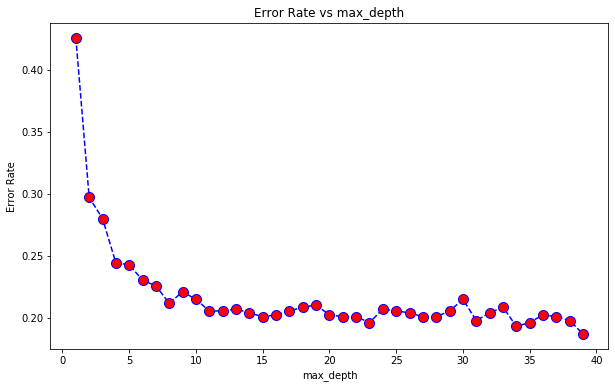

In [290]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')

In [349]:
# best value of max_depth is 40
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=None,max_depth=40)
rfc.fit(df_train, df_target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [350]:
rfc_pred = rfc.predict(df_test)

In [351]:
print(confusion_matrix(df_target_test,rfc_pred))
print("Accuracy:",metrics.accuracy_score(df_target_test, rfc_pred))

[[127  13  21   0   0]
 [ 19 125   0   2   0]
 [ 23   0 118   0  18]
 [  0   1   0  12   0]
 [  2   0  25   0 137]]
Accuracy: 0.807153965785381


By setting n_estimators to 100,criterion to 'entropy', random_state to None and max_depth to 40, the maximum accuracy achieved is 80.7%

Of all of the above classification techniques, Random Forest Classifier has maximum accuracy. So, let's perform prediction using random forest